In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
data = json.load(open('../../data/json/dim/all/relevant_data.json'))

In [20]:
tu = {id: value for id, value in data.items() if 'depositonce' in id}
hu = {id: value for id, value in data.items() if 'edoc' in id}
fu = {id: value for id, value in data.items() if 'refubium' in id}
print(f'There are {len(data)} documents in the corpus')
print(f'{len(tu)} of them belong to depositonce ({round(len(tu)/len(data), 2)})')
print(f'{len(hu)} of them belong to edoc ({round(len(hu)/len(data), 2)})')
print(f'{len(fu)} of them belong to refubium ({round(len(fu)/len(data), 2)})')

There are 29399 documents in the corpus
7438 of them belong to depositonce (0.25)
7497 of them belong to edoc (0.26)
14464 of them belong to refubium (0.49)


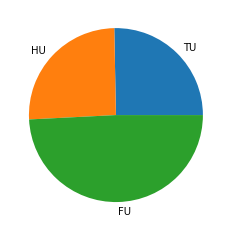

In [21]:
plt.pie([len(tu), len(hu), len(fu)], labels=['TU', 'HU', 'FU'])
plt.show()

In [24]:
def get_nulls(data):
  title, abstract, both = 0, 0, 0
  for elem in data:
    null_title = data[elem]['title'] is None
    null_abstract = data[elem]['abstract'] is None
    if null_title and null_abstract:
      both += 1
    elif null_title:
      title += 1
    elif null_abstract:
      abstract += 1
  return title, abstract, both

In [27]:
for k, v in {'TU': tu, 'HU': hu, 'FU': fu}.items():
  print(k)
  title, abstract, both = get_nulls(v)
  print(f'{both} documents are completely empty ({round(both/len(v), 2)}).')
  print(f'{title} documents have empty titles ({round(title/len(v), 2)}).')
  print(f'{abstract} documents have empty abstracts ({round(abstract/len(v), 2)}).')
  print(f'In total, {both+title+abstract} documents are incomplete ({round((both+title+abstract)/len(v), 2)}).\n')

TU
2 documents are completely empty (0.0).
7264 documents have empty titles (0.98).
172 documents have empty abstracts (0.02).
In total, 7438 documents are incomplete (1.0).

HU
0 documents are completely empty (0.0).
6484 documents have empty titles (0.86).
1013 documents have empty abstracts (0.14).
In total, 7497 documents are incomplete (1.0).

FU
61 documents are completely empty (0.0).
8873 documents have empty titles (0.61).
5530 documents have empty abstracts (0.38).
In total, 14464 documents are incomplete (1.0).

